Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [1]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import seaborn as sns
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Rescaling
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

#normalization_layer = tensorflow.keras.layers.experimental.preprocessing.Rescaling(1./255)


In [2]:
## If you are using the data by mounting the google drive, use the following :
## from google.colab import drive
## drive.mount('/content/gdrive')

#drive.mount('https://drive.google.com/drive/folders/1G1NRARS7CUudpqTPGI2KSgRXZ08lScoS')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

In [3]:
## UNCOMMENT FOR GOOGLE COLAB

# from google.colab import drive
# drive.mount('/content/drive/', force_remount=True)
# data_dir_train = pathlib.Path('/content/drive/My Drive/Colab Notebooks/SkinCancer/Train')
# data_dir_test = pathlib.Path('/content/drive/My Drive/Colab Notebooks/SkinCancer/Test')

## UNCOMMENT WHEN WORKING IN LOCAL JUPYTER

data_dir_train = pathlib.Path('Data/Train')
data_dir_test = pathlib.Path('Data/Test')

In [4]:
import os



trainingimages = 0
lst = os.listdir(data_dir_train) # your directory path
print ("TRAINING FOLDER DETAILS")
print ("----------------------")

classname =[]
samplecount=[]
for dirname in lst:
    folderpath = str(data_dir_train) + "\\" + dirname
    lst = os.listdir(folderpath)
    trainingimages += len(lst)
    print (dirname + "\t" + str(len(lst)))
    classname.append(dirname)
    samplecount.append(len(lst))
print ("\nTotal Files  " + str(trainingimages) + "\n\n")
dict = {'classname': classname, 'samplecount': samplecount}
training_ds_summary = pd.DataFrame(dict)

testimages = 0
lst = os.listdir(data_dir_test) # your directory path
print ("TESTING FOLDER DETAILS")
print ("----------------------")

for dirname in lst:
    folderpath = str(data_dir_test) + "\\" + dirname
    lst = os.listdir(folderpath)
    testimages += len(lst)
    print (dirname + "\t" + str(len(lst)))
print ("\nTotal Files  " + str(testimages) + "\n\n")

TRAINING FOLDER DETAILS
----------------------
actinic keratosis	115
basal cell carcinoma	377
dermatofibroma	96
melanoma	439
nevus	358
pigmented benign keratosis	463
seborrheic keratosis	78
squamous cell carcinoma	182
vascular lesion	140

Total Files  2248


TESTING FOLDER DETAILS
----------------------
actinic keratosis	16
basal cell carcinoma	16
dermatofibroma	16
melanoma	16
nevus	16
pigmented benign keratosis	16
seborrheic keratosis	3
squamous cell carcinoma	16
vascular lesion	3

Total Files  118




This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [5]:


image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)

image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)



2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.
Use 80% of the images for training, and 20% for validation.

In [6]:
directory_train = data_dir_train
directory_test = data_dir_test

training_ds=keras.utils.image_dataset_from_directory(
    directory_train,
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(180, 180),
    shuffle=True,
    seed=123,
    validation_split=0.2,
    subset="training",
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)


validation_ds=keras.utils.image_dataset_from_directory(
    directory_train,
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(180, 180),
    shuffle=True,
    seed=123,
    validation_split=0.2,
    subset="validation",
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

testing_ds=keras.utils.image_dataset_from_directory(
    directory_test,
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(180, 180),
    shuffle=True,
    seed=123,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.
Found 6739 files belonging to 9 classes.
Using 1347 files for validation.
Found 118 files belonging to 9 classes.


### Create a dataset

Define some parameters for the loader:

In [7]:
batch_size = 32
img_height = 180
img_width = 180


In [8]:
# List out all the classes of skin cancer and store them in a list.
# You can find the class names in the class_names attribute on these datasets.
# These correspond to the directory names in alphabetical order.
class_names = training_ds.class_names
print(class_names)


['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

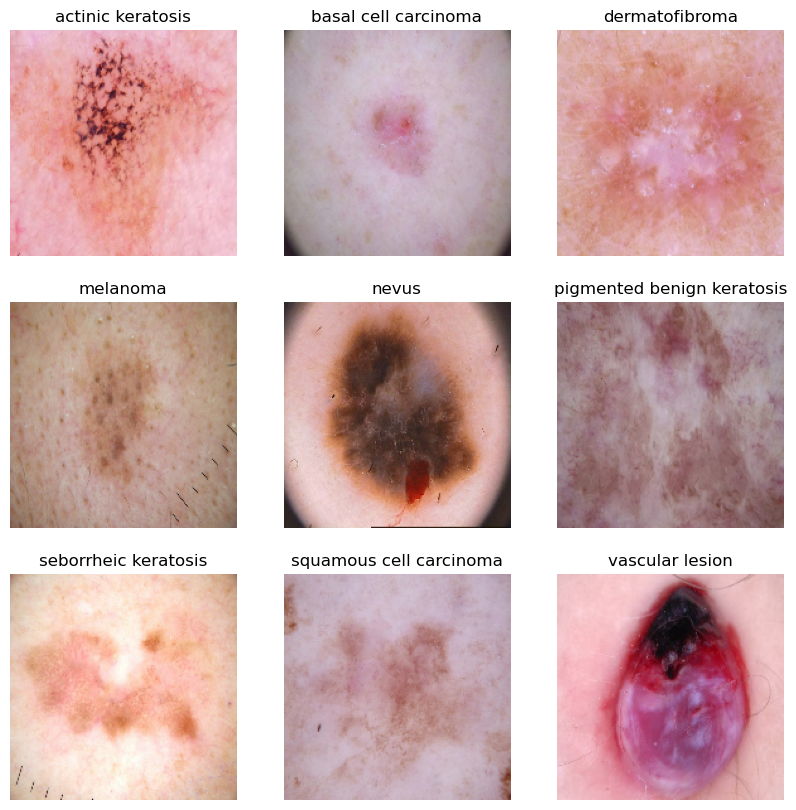

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))

for i in range(len(class_names)):
    filtered_ds = training_ds.filter(lambda x, l: tf.math.equal(l[0], i))
    for image, label in filtered_ds.take(1):
        ax = plt.subplot(3, 3, i+1)
        plt.imshow(image[0].numpy().astype('uint8'))
        plt.title(class_names[label.numpy()[0]])
        plt.axis('off')
### your code goes here, you can use training or validation data to visualize

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [10]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
training_ds = training_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
validation_ds = validation_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [11]:
### Your code goes here

num_classes = len(class_names)
normalization_layer = Rescaling(1./255)

normalized_training_set = training_ds.map(lambda x, y: (normalization_layer(x), y))
training_image_batch,training_labels_batch = next(iter(normalized_training_set))

normalized_validation_set = validation_ds.map(lambda x, y: (normalization_layer(x), y))
validation_image_batch,validation_labels_batch = next(iter(normalized_validation_set))

normalized_testing_set = testing_ds.map(lambda x, y: (normalization_layer(x), y))
testing_image_batch,testing_labels_batch = next(iter(normalized_testing_set))



training_labels_batch = tf.keras.utils.to_categorical(training_labels_batch, num_classes)
validation_labels_batch = tf.keras.utils.to_categorical(validation_labels_batch, num_classes)

In [12]:
from keras.optimizers import Adam

model = Sequential([
  layers.Conv2D(16, (3, 3), padding='same', activation=tf.nn.relu,input_shape=training_image_batch.shape[1:]),
  layers.MaxPooling2D(),
  layers.Conv2D(32, (3, 3), padding='same', activation=tf.nn.relu),
  layers.MaxPooling2D(),
  layers.Conv2D(64, (3, 3), padding='same', activation=tf.nn.relu),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation=tf.nn.relu),
  layers.Dense(num_classes)
])

C:\Users\mathu\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Compile the model
Choose an appropirate optimiser and loss function for model training

In [13]:
# Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [14]:
# View the summary of all layers
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 180, 180, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 90, 90, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 90, 90, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 45, 45, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 45, 45, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 30976)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,965,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 9)                   │           1,161 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,989,801 (15.22 MB)

 Trainable params: 3,989,801 (15.22 MB)

 Non-trainable params: 0 (0.00 B)

### Train the model

In [15]:
epochs = 20
history = model.fit(
  normalized_training_set,
  validation_data=normalized_validation_set,
  epochs=epochs
)



Epoch 1/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 31s 167ms/step - accuracy: 0.2362 - loss: 1.9312 - val_accuracy: 0.4499 - val_loss: 1.5274
Epoch 2/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 29s 172ms/step - accuracy: 0.4602 - loss: 1.4379 - val_accuracy: 0.5174 - val_loss: 1.3347
Epoch 3/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 30s 177ms/step - accuracy: 0.5734 - loss: 1.1588 - val_accuracy: 0.5843 - val_loss: 1.1356
Epoch 4/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 27s 162ms/step - accuracy: 0.6403 - loss: 1.0082 - val_accuracy: 0.6206 - val_loss: 1.0210
Epoch 5/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 29s 170ms/step - accuracy: 0.7439 - loss: 0.7296 - val_accuracy: 0.6733 - val_loss: 0.8691
Epoch 6/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 29s 170ms/step - accuracy: 0.7930 - loss: 0.5760 - val_accuracy: 0.7365 - val_loss: 0.7835
Epoch 7/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 29s 171ms/step - accuracy: 0.8411 - loss: 0.4606 - val_accuracy: 0.7810 - val_loss: 0.6984
Epoch 8/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 30s 179ms/step - accuracy: 0.8775 - loss: 0

### Visualizing training results

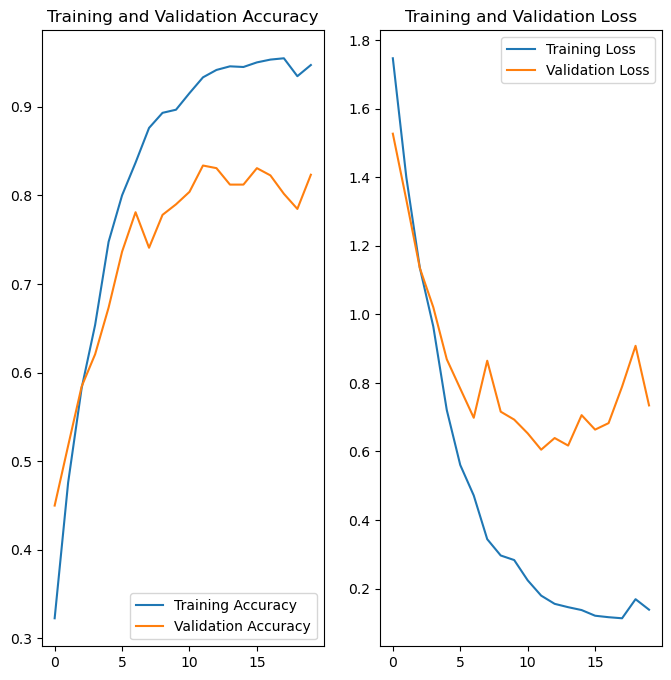

In [16]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit


### Write your findings here
The Model is Overfitting. There is huge difference between the Training and Validation Accuracy after 20 Epochs.
Training Accuracy:  89%
Validation Accuracy: 55%.

Also the Training losss is very low compared to the Validation loss that further more indicates a overfitting

In [17]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy.
# Your code goes here
from tensorflow.keras.layers import Layer
import tensorflow as tensorflow
augmentation_data = keras.Sequential([
                                      layers.RandomFlip("horizontal_and_vertical", input_shape=(img_height, img_width, 3)),
                                      layers.RandomRotation(0.2),
                                      layers.RandomZoom(0.2),
])



C:\Users\mathu\anaconda3\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


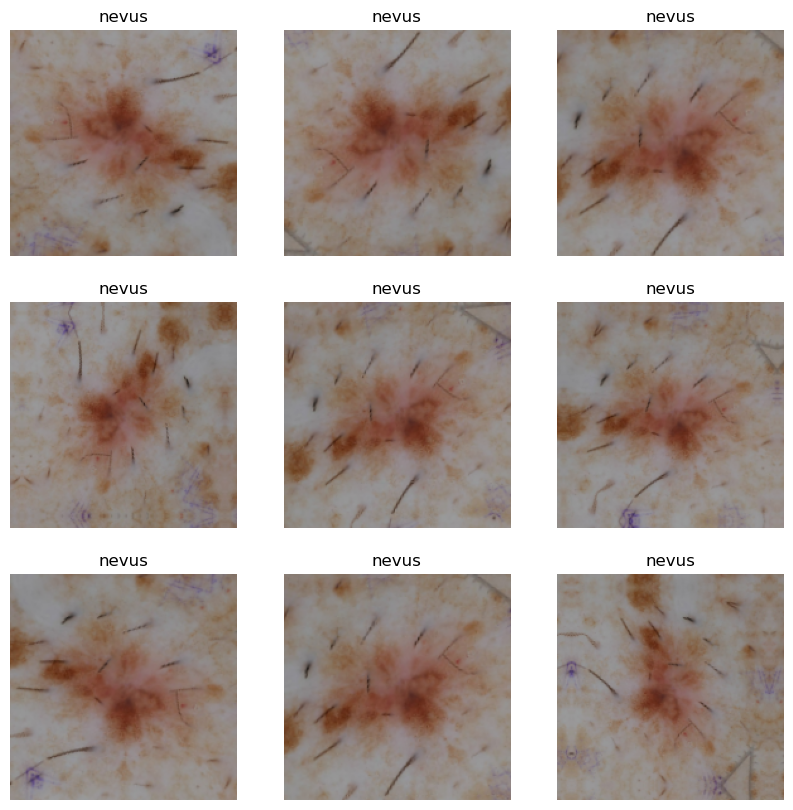

In [18]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# Your code goes here
plt.figure(figsize=(10, 10))
for images, labels in training_ds.take(1):
    for i in range(9):
        augmented_images = augmentation_data(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.title(class_names[labels[0]])
        plt.axis("off")

### Todo:
### Create the model, compile and train the model


In [19]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes here
model = Sequential([
  augmentation_data,
  layers.Conv2D(16, (3, 3), padding='same', activation=tf.nn.relu,input_shape=training_image_batch.shape[1:]),
    
  layers.MaxPooling2D(),
  layers.Conv2D(32, (3, 3), padding='same', activation=tf.nn.relu),
#  layers.Dropout(0.25),
  layers.MaxPooling2D(),
  layers.Conv2D(64, (3, 3), padding='same', activation=tf.nn.relu),
#  layers.Dropout(0.25), 
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation=tf.nn.relu),
  layers.Dense(num_classes)
])



### Compiling the model

In [20]:
## Your code goes here
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


### Training the model

In [21]:
## Your code goes here, note: train your model for 20 epochs
#history = ## your training code
epochs = 20
history = model.fit(
  normalized_training_set,
  validation_data=normalized_validation_set,
  epochs=epochs
)


Epoch 1/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 36s 195ms/step - accuracy: 0.1806 - loss: 2.1364 - val_accuracy: 0.4024 - val_loss: 1.6196
Epoch 2/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 33s 195ms/step - accuracy: 0.3767 - loss: 1.5658 - val_accuracy: 0.4098 - val_loss: 1.4901
Epoch 3/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 32s 192ms/step - accuracy: 0.4137 - loss: 1.4987 - val_accuracy: 0.4395 - val_loss: 1.4477
Epoch 4/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 32s 190ms/step - accuracy: 0.4577 - loss: 1.3862 - val_accuracy: 0.4328 - val_loss: 1.3974
Epoch 5/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 33s 195ms/step - accuracy: 0.4681 - loss: 1.3780 - val_accuracy: 0.4774 - val_loss: 1.3569
Epoch 6/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 32s 191ms/step - accuracy: 0.4956 - loss: 1.2954 - val_accuracy: 0.5078 - val_loss: 1.3054
Epoch 7/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 34s 198ms/step - accuracy: 0.5130 - loss: 1.2691 - val_accuracy: 0.4974 - val_loss: 1.3059
Epoch 8/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 33s 197ms/step - accuracy: 0.5196 - loss: 1

### Visualizing the results

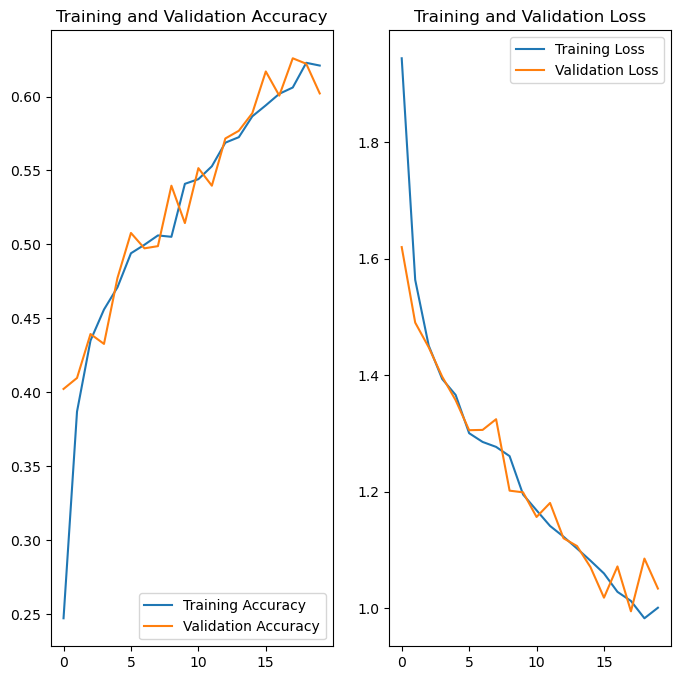

In [22]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

The Model is no more Overfitting. The Accuracy Percentages in Training and Validation models are in the same range (same with the training and validation loss). Augumenting the data helped in mitigating the over fitting

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

<Axes: xlabel='classname'>

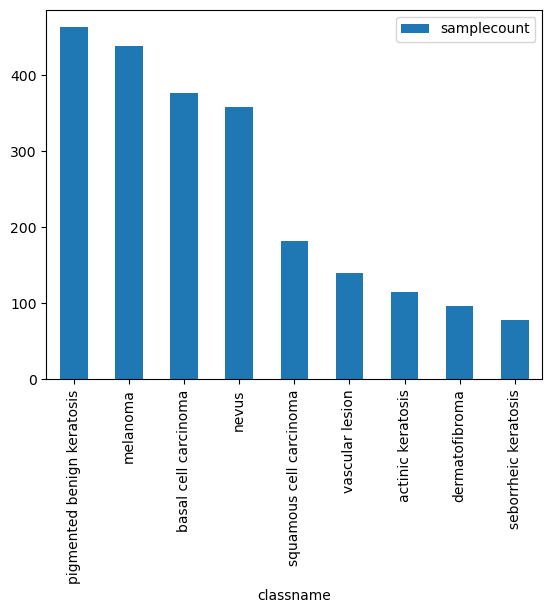

In [23]:
training_ds_summary.sort_values(by='samplecount',ascending=False).plot.bar(x='classname',y='samplecount')


In [24]:
## RAM: to be removed
## Your code goes here.
from glob import glob

## find the image path for all class labels (lesions)
images_path_list = [ i for i in glob(os.path.join(data_dir_train, '*', '*.jpg')) ]

## Extract the class labels (lesions)
lesions_list = [ os.path.basename(os.path.dirname(j)) for j in glob(os.path.join(data_dir_train, '*', '*.jpg')) ]
print(len(lesions_list))


2239


#### **Todo:** Write your findings here:
#### - Which class has the least number of samples?
#### - Which classes dominate the data in terms proportionate number of samples?
There is clearly an Imbalance as there are very few samples for "dermatofibroma" and "seborrheic keratosis" compared to "pigmented benign keratosis". Not having enough samples will lead to overfitting as the model will be restricted to learning from the limited samples 

#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [25]:
!pip install Augmentor

In [26]:
data_dir_train

WindowsPath('Data/Train')

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [27]:
path_to_training_dataset=data_dir_train
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(str(path_to_training_dataset) + "\\" + str(i))
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to Data\Train\actinic keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1B32DB79350>: 100%|█| 500/500 [00:02<00:00, 182.23 Samples


Initialised with 376 image(s) found.
Output directory set to Data\Train\basal cell carcinoma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1B30F6C8690>: 100%|█| 500/500 [00:02<00:00, 181.72 Samples


Initialised with 95 image(s) found.
Output directory set to Data\Train\dermatofibroma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1B30F682310>: 100%|█| 500/500 [00:02<00:00, 172.89 Samples


Initialised with 438 image(s) found.
Output directory set to Data\Train\melanoma\output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x1B30F691490>: 100%|█| 500/500 [00:15<00:00, 32.44 Samples


Initialised with 357 image(s) found.
Output directory set to Data\Train\nevus\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x1B32E29E210>: 100%|█| 500/500 [00:14<00


Initialised with 462 image(s) found.
Output directory set to Data\Train\pigmented benign keratosis\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x1B30F5D0CD0>: 100%|█| 500/500 [00:02<00:


Initialised with 77 image(s) found.
Output directory set to Data\Train\seborrheic keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x1B37AD399D0>: 100%|█| 500/500 [00:06<00:00, 72.10 Samples


Initialised with 181 image(s) found.
Output directory set to Data\Train\squamous cell carcinoma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1B32DAB7E50>: 100%|█| 500/500 [00:02<00:00, 177.92 Samples


Initialised with 139 image(s) found.
Output directory set to Data\Train\vascular lesion\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1B30F5F74D0>: 100%|█| 500/500 [00:02<00:00, 173.72 Samples


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [28]:

image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

9000


### Lets see the distribution of augmented data after adding new images to the original training data.

In [31]:
path_list = [x for x in glob(os.path.join(data_dir_train,'*', '*.jpg'))]

path_list_augument = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]


In [38]:
len(path_list_augument)

9000

In [34]:
lesion_list_augument = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]

lesion_list = [os.path.basename(os.path.dirname(y)) for y in glob(os.path.join(data_dir_train, '*', '*.jpg'))]


In [37]:

len(lesion_list_augument)

9000

<Axes: >

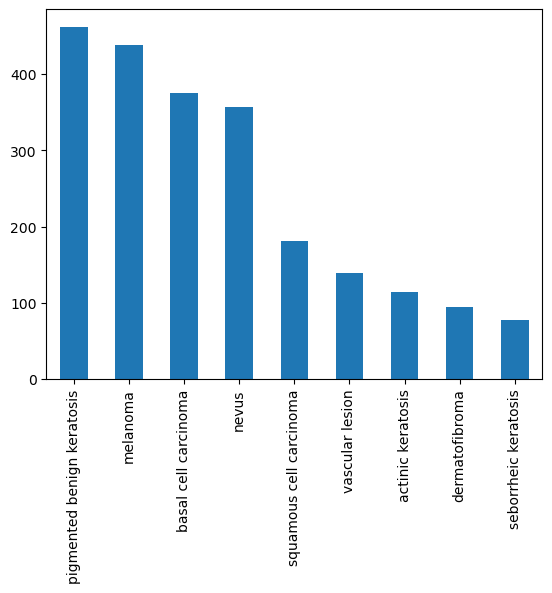

In [52]:
# dataframe_dict_augument = dict(zip(path_list_augument, lesion_list_augument))

# dataframe_dict = dict(zip(path_list, lesion_list))


#### Ram
dataframe_dict = {'classname': lesion_list, 'path': path_list}
df_training_org = pd.DataFrame(dataframe_dict)
df_training_org['classname'].value_counts().plot.bar()


<Axes: >

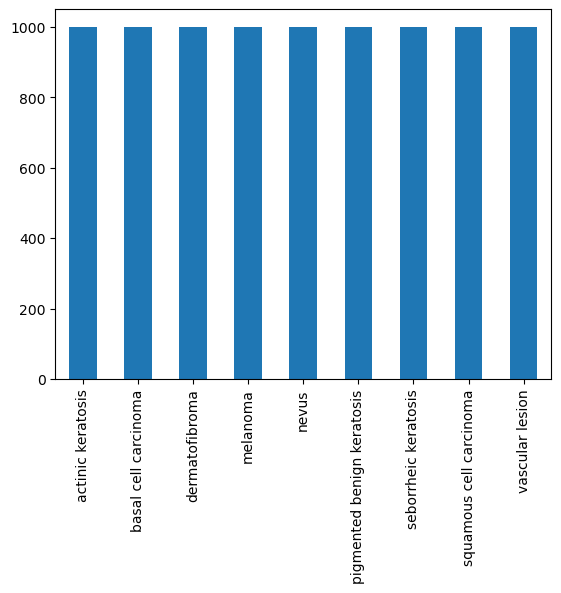

In [53]:
dataframe_augument_dict = {'classname': lesion_list_augument, 'path': path_list_augument}
df_training_augument = pd.DataFrame(dataframe_augument_dict)
df_training_augument['classname'].value_counts().plot.bar()


<Axes: >

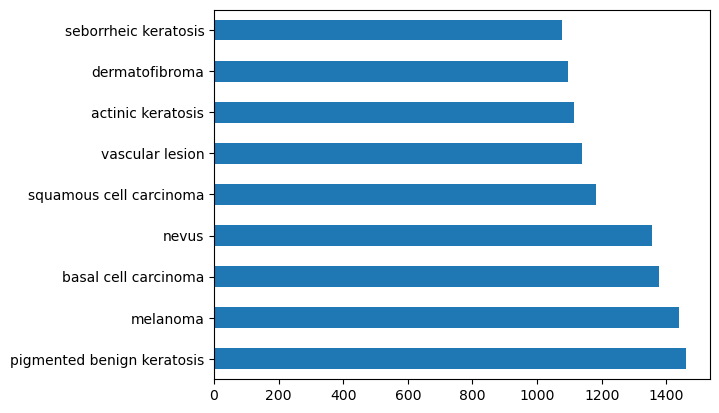

In [57]:
# dataframe_augument_dict = {'classname': lesion_list_augument, 'path': path_list_augument}
# df_training_augument = pd.DataFrame(dataframe_augument_dict)
# df_training_augument['classname'].value_counts().plot.bar()

frames = [df_training_org, df_training_augument]
df_training_consolidated = pd.concat(frames)
df_training_consolidated['classname'].value_counts().plot.barh()


So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [58]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [59]:
directory_train = data_dir_train
directory_test = data_dir_test

#data_dir_train="path to directory with training data + data created using augmentor"
# train_ds = tf.keras.preprocessing.image_dataset_from_directory(
#   data_dir_train,
#   seed=123,
#   validation_split = 0.2,
#   subset = ## Todo choose the correct parameter value, so that only training data is refered to,,
#   image_size=(img_height, img_width),
#   batch_size=batch_size)



training_ds=keras.utils.image_dataset_from_directory(
    directory_train,
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(180, 180),
    shuffle=True,
    seed=123,
    validation_split=0.2,
    subset="training",
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)


Found 11239 files belonging to 9 classes.
Using 8992 files for training.


#### **Todo:** Create a validation dataset

In [60]:
# val_ds = tf.keras.preprocessing.image_dataset_from_directory(
#   data_dir_train,
#   seed=123,
#   validation_split = 0.2,
#   subset = ## Todo choose the correct parameter value, so that only validation data is refered to,
#   image_size=(img_height, img_width),
#   batch_size=batch_size)

validation_ds=keras.utils.image_dataset_from_directory(
    directory_train,
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(180, 180),
    shuffle=True,
    seed=123,
    validation_split=0.2,
    subset="validation",
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

Found 11239 files belonging to 9 classes.
Using 2247 files for validation.


In [61]:
class_names = validation_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


#### **Todo:** Create your model (make sure to include normalization)

In [ ]:
## your code goes here



normalized_training_set = training_ds.map(lambda x, y: (normalization_layer(x), y))
training_image_batch,training_labels_batch = next(iter(normalized_training_set))

normalized_validation_set = validation_ds.map(lambda x, y: (normalization_layer(x), y))
validation_image_batch,validation_labels_batch = next(iter(normalized_validation_set))

normalized_testing_set = testing_ds.map(lambda x, y: (normalization_layer(x), y))
testing_image_batch,testing_labels_batch = next(iter(normalized_testing_set))



training_labels_batch = tf.keras.utils.to_categorical(training_labels_batch, num_classes)
validation_labels_batch = tf.keras.utils.to_categorical(validation_labels_batch, num_classes)


from keras.optimizers import Adam


model = Sequential([
  layers.Conv2D(16, (3, 3), padding='same', activation=tf.nn.relu,input_shape=training_image_batch.shape[1:]),
  layers.MaxPooling2D(),
  layers.Conv2D(32, (3, 3), padding='same', activation=tf.nn.relu),
  layers.MaxPooling2D(),
  layers.Conv2D(64, (3, 3), padding='same', activation=tf.nn.relu),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation=tf.nn.relu),
  layers.Dense(num_classes)
])



#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [ ]:
## your code goes here
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#### **Todo:**  Train your model

In [ ]:
epochs = 50
## Your code goes here, use 50 epochs.

history = model.fit(
  normalized_training_set,
  validation_data=normalized_validation_set,
  epochs=epochs
)

#### **Todo:**  Visualize the model results

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')

plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



In [ ]:
class_names = training_ds.class_names
print(class_names)

In [ ]:
training_image_batch.shape[:]